## Concept

* Type of forecasting -> aimed at removing/smoothing short term fluctuations (volatility)
* Esp useful with stock prices
* Reference : https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/

### ARIMA VS Holt Winters:
* ARIMA can deal with any time series analysis as it makes the data stationary first
* Holt’s Winter method can work with data having a trend and seasonality. 
* Error predictions can vary compared to ARIMA. 
* Real-world data such as stock market data often use RNN, LSTM, etc.

### Approach to forecast
* Naive (last observed)
* Simple Average
* Moving Average
* Weighted Moving Average
* Single Exponential Smoothing
* Double Exponential Smoothing
* Triple Exponential Smoothing

### 1. Naive forecast

In [131]:
def plot_forecast(series, forecast, title):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot(series)
    forecast_index = range(len(series)-1, len(series)+len(forecast)-1)
    plt.plot(forecast_index, forecast)
    plt.title(title)
    plt.show()

[12, 12, 12, 12, 12]


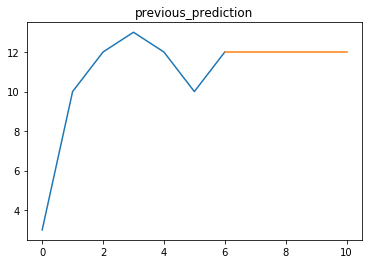

In [132]:
# Previous prediction
series = [3,10,12,13,12,10,12]

forecast = []
history = series
forecast_horizon = 5

for i in range(forecast_horizon):
    forecast.append(history[-1])
    history = history[-len(series):]
print(forecast)

plot_forecast(series, forecast, 'previous_prediction')

### 2. Moving Average

[10.3, 11.3, 11.5, 11.4, 11.2]


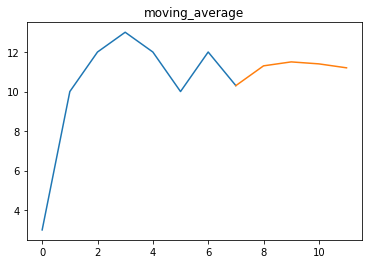

In [133]:
# Moving average

import numpy as np
series = [3,10,12,13,12,10,12]
n = len(series)

forecast = []
history = series
forecast_horizon = 5

for i in range(forecast_horizon):
    # calc avg
    avg = np.round(np.mean(history), 1)
    # append avg
    history.append(avg)
    # move ahead
    history = history[-n:]

# forecast horizon
forecast = history[-forecast_horizon:]

print(forecast)

plot_forecast(series, forecast, 'moving_average')

### 3. Weighted Moving Average

* Similar to Moving Average but sliding window values are given diff weights
* Recent points matter more
* Try Changing weights

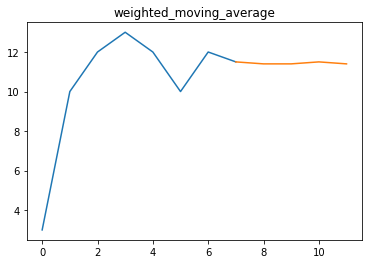

In [134]:
# Moving average

import numpy as np

series = [3,10,12,13,12,10,12]
n = len(series)
weights_1 = [0.1, 0.2, 0.3, 0.4]

forecast = []
history = series
forecast_horizon = 5
for i in range(forecast_horizon):
    # calc avg
    avg = np.round(np.dot(weights, history[-4:]), 1)
    # append avg
    history.append(avg)
    # move ahead
    history = history[-n:]
forecast = history[-forecast_horizon:]

plot_forecast(series, forecast, 'weighted_moving_average')

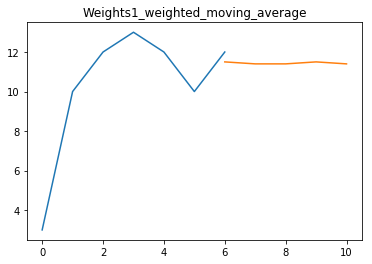

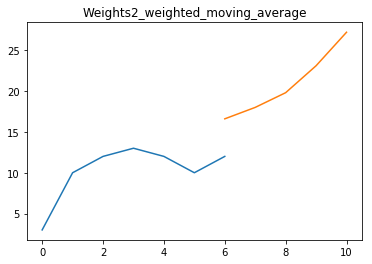

In [136]:
# Functional Approach : Moving average

import numpy as np

series = [3,10,12,13,12,10,12]
n = len(series)
weights_1 = [0.1, 0.2, 0.3, 0.4]
weights_2 = [0.4, 0.3, 0.3, 0.4]

def moving_average(series, weights):
    forecast = []
    history = [3,10,12,13,12,10,12]
    forecast_horizon = 5
    for i in range(forecast_horizon):
        # calc avg
        avg = np.round(np.dot(weights, history[-4:]), 1)
        # append avg
        history.append(avg)
        # move ahead
        history = history[-n:]
    return history[-forecast_horizon:]

# forecast horizon
forecast_1 = moving_average(series, weights_1)
forecast_2 = moving_average(series, weights_2)


plot_forecast(series, forecast_1, 'Weights1_weighted_moving_average')
plot_forecast(series, forecast_2, 'Weights2_weighted_moving_average')

## 4. Single Exponential Smoothing

* In Weighted moving avg we considered only last 4 values, what if we considered all the values?!
* Weights can be assigned in decreasing fashion like below
    * weights = $ 0.9^1, 0.9^2, 0.9^3... $
              = 0.9, 0.81, 0.729 ... 
    * Problem : they dont sum to 1! -> could be problematic
    
* Recursion & Simple:

    * $ \hat y_t = \alpha y_t + (1 - \alpha) \hat y_{t-1} $
    * Weights sum to 1
    * $(1 - \alpha)$ is getting multiplied by itself again till begining - > Hence exponential 
    * $\alpha$ - memory decay rate -> high -> faster forgets
    
* Why Smoothing?
    * jagged lines becomes smoother
    * Even moving average can be called smoothing too

Text(0.5,1,'single_weighted_moving_average')

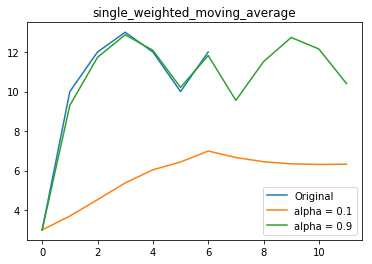

In [137]:
# Single Exp Smoothing Average

import numpy as np

y = [3,10,12,13,12,10,12]
n = len(y)

forecast = []
history = series
forecast_horizon = 5

def exponential_smoothing(y, alpha):
    yhat = [y[0]]
    y_history = y.copy() # for making forecast
    for n in range(1, len(y) + 5):
        # prediction step
        yhat_n = alpha*y_history[n] + (1 - alpha)*yhat[n-1]
        # store predictions
        yhat.append(yhat_n)
        # keep updating y to move ahead
        y_history.append(yhat_n)
    return yhat

forecast_01 = exponential_smoothing(y, alpha = 0.1)
forecast_09 = exponential_smoothing(y, alpha = 0.9)

plt.plot(series, label = 'Original')
plt.plot(forecast_01, label = 'alpha = 0.1')
plt.plot(forecast_09, label = 'alpha = 0.9')
plt.legend()
plt.title('single_weighted_moving_average')

## Observations

* $\alpha$ = 0.9 follows the curve closer than 0.1
* Each series can have its own optimal  $\alpha$

## 5. Double Exponential Smoothing

* Until now we have discussed how to forecast the levels
* Concepts used in the following DES
    * Level
    * Trend
    * Additive/Multiplicative
* DES works with level and trend
* Formulation:
    * level : $l_t = \alpha y_t + (1 - \alpha) l_{t-1} $
        * Similar to SES, but instead of $\hat y$ we have l (with sum of level and trend)
    * trend: $b_t = \beta (l_t - l_{t-1}) + (1 - \beta) b_{t-1} $
    * forecast = $l_t + h * b_t $

Text(0.5,1,'Double_weighted_moving_average')

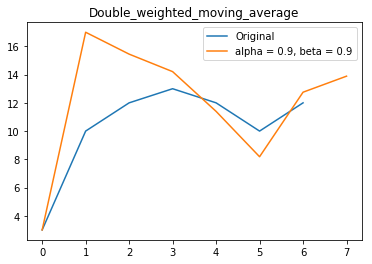

In [138]:
y = [3,10,12,13,12,10,12]
n = len(y)

# given a series and alpha, return series of smoothed points
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
          value = result[-1]
        else:
          value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

forecast_09_09 = double_exponential_smoothing(y, alpha = 0.9, beta = 0.9)

plt.plot(series, label = 'Original')
plt.plot(forecast_09_09, label = 'alpha = 0.9, beta = 0.9')
plt.legend()
plt.title('Double_weighted_moving_average')

### 6. Triple Exponential Smoothing

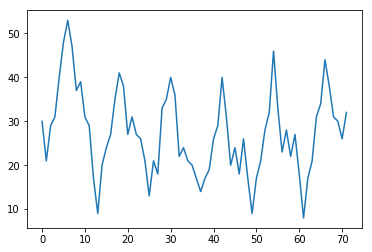

In [139]:
series = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]
plt.plot(series)

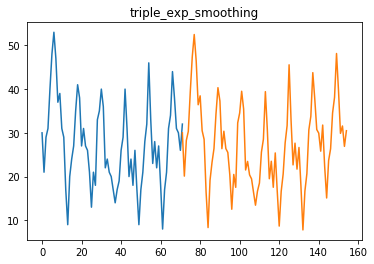

In [140]:
def initial_trend(series, slen):
    '''avg trend across series
    cal trend across every peak and avg them
    initial_trend(series, 12) >>> -0.784'''
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen


def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

forecast = triple_exponential_smoothing(series, slen= 12, alpha=0.7 , beta= 0.02, gamma=0.9 , n_preds=12)
plot_forecast(series, forecast, 'triple_exp_smoothing')